In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

In [3]:
data = pd.read_csv('data/pes.csv', delimiter='\t', header=None)
angles = np.arange(-1.8, 9, 0.3)

promi = 3


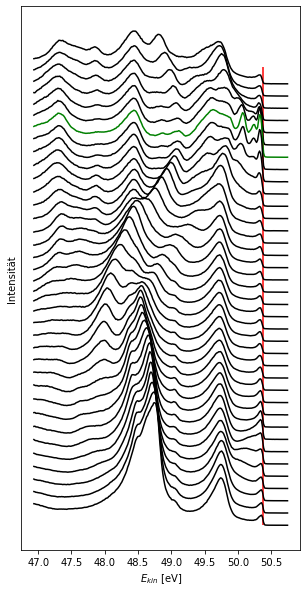

In [5]:
plt.figure(figsize=(5,10))
for i in data.columns[1:]:
    if i == 7:
        plt.plot(data[0], data[i], c='green')
    else:
        plt.plot(data[0], data[i], c='black')

plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.ylabel('Intensität')
plt.xlabel('$E_{kin}$ [eV]')
plt.vlines(50.38, 0, 700, color='red')
plt.savefig('images/intensitaet_gesamt.png', dpi=300)

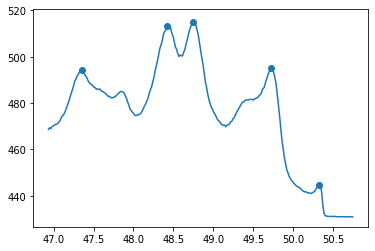

In [6]:
i = 14
plt.plot(data[0], data[i])
peaks = find_peaks(data[i], prominence=promi)
plt.scatter([data[0][peak] for peak in peaks[0]], [data[i][peak] for peak in peaks[0]])


In [7]:
findpeaks = []
for i in data.columns[1:]:
    peaks = find_peaks(data[i], prominence=promi)
    for j in np.arange(len(peaks[0])):
        findpeaks.append([angles[i-1], data[0][peaks[0][j]], 50.38 - data[0][peaks[0][j]]])

allpeaks = np.column_stack(findpeaks)


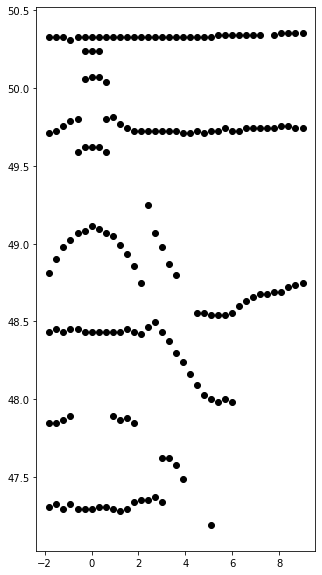

In [8]:

plt.figure(figsize=(5,10))
plt.scatter(allpeaks[0], allpeaks[1], c='black')


Text(0.5, 0, '$E_{kin}$ [eV]')

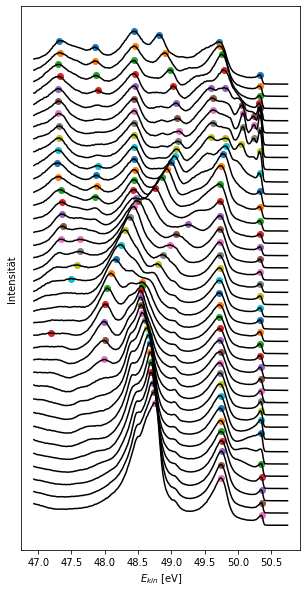

In [9]:

plt.figure(figsize=(5,10))
for i in data.columns[1:]:
    plt.plot(data[0], data[i], c='black')
    peaks = find_peaks(data[i], prominence=promi)
    plt.scatter([data[0][peak] for peak in peaks[0]], [data[i][peak] for peak in peaks[0]])

plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.ylabel('Intensität')
plt.xlabel('$E_{kin}$ [eV]')


In [10]:
# Berechnung des Wellenvektors
import scipy.constants as const
def k(E_kin, alpha):
    return np.sin(np.pi * alpha / 180) * np.sqrt(E_kin * 2 * const.m_e / const.hbar**2)
k_for_plot = []
bind_energy_for_plot = []
for peak in findpeaks:
    k_for_plot.append(k(peak[1], peak[0]))
    bind_energy_for_plot.append(peak[2])


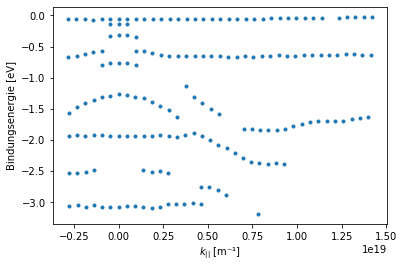

In [11]:
# Plot Bandstruktur
plt.scatter(k_for_plot, -1*np.asarray(bind_energy_for_plot), marker='.')
plt.xlabel('$k_{||}$ [m⁻¹]')
plt.ylabel('Bindungsenergie [eV]')
plt.savefig('images/bandstruktur.png', dpi=300)